## Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import datetime
import requests, json, re
import genson
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Load Data

In [2]:
tweets = []
with open('./tweets.json', 'r') as f:
    for line in f.readlines():
        tweets.append(json.loads(line))
print('There are', len(tweets),'tweets for topic clustering.')
print('Here is an example of the tweet:')
print(tweets[0])

There are 5071 tweets for topic clustering.
Here is an example of the tweet:
{'url': 'https://twitter.com/AshleyDHeck1/status/1244776214222553088', 'text': 'Ya know how everyone kept saying "hold my beer", as a way to show things could most definitely get worse in situations? ... Well they named this stupid virus after a beer. 🤦🍷🍷🤷😂 #randomthoughts #coronavirus #wth #COVID19 #corona #lol #imlosingit https://t.co/gZJIKJc8md', 'date': 1585612750000, 'tweet_id': 1244776214222553088, 'user_name': 'AshleyDHeck1', 'cleaned_text': 'Ya know how everyone kept saying hold my beer as a way to show things could most definitely get worse in situations  Well they named this stupid virus after a beer  randomthoughts coronavirus wth COVID corona lol imlosingit '}


In [3]:
df = pd.DataFrame(tweets[0:])
df = df.iloc[: , 0:6]
df.columns =["url","text","date","tweet_id","user_name","cleaned_text"]
df['date']=df['date'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d'))
df.head()

,url,text,date,tweet_id,user_name,cleaned_text
0,https://twitter.com/AshleyDHeck1/status/124477...,"Ya know how everyone kept saying ""hold my beer...",2020-03-30,1244776214222553088,AshleyDHeck1,Ya know how everyone kept saying hold my beer ...
1,https://twitter.com/CffeeAndSarcasm/status/124...,AA is going to need a bouncer when this is ove...,2020-03-30,1244758836516397056,CffeeAndSarcasm,AA is going to need a bouncer when this is ove...
2,https://twitter.com/KarinBrauns/status/1244757...,Don’t drown in your own thoughts.. Stay close ...,2020-03-30,1244757544431751171,KarinBrauns,Don’t drown in your own thoughts Stay close at...
3,https://twitter.com/AspenBrewingCo/status/1244...,Mix it up this week with a delicious pizza and...,2020-03-30,1244753120669958144,AspenBrewingCo,Mix it up this week with a delicious pizza and...
4,https://twitter.com/Didanmeg/status/1244748406...,The only beer we will be drinking until this w...,2020-03-30,1244748406435852289,Didanmeg,The only beer we will be drinking until this w...


## SentimentIntensityAnalyzer

In [4]:
text = list(df['cleaned_text'])

In [5]:
sent_analyzer = SentimentIntensityAnalyzer()
for sentence in text:
    scores = sent_analyzer.polarity_scores(sentence)

In [6]:
positive=[]
negative=[]
neutral=[]
sent_analyzer = SentimentIntensityAnalyzer()
for sentence in text:
    scores = sent_analyzer.polarity_scores(sentence)
    if scores["compound"] >= 0.05:
       positive.append(sentence)
    elif scores["compound"] <= -0.05:
        negative.append(sentence)
    else:
        neutral.append(sentence)

In [7]:
dic = {'positive': len(positive), 'neutral': len(neutral), 'negative': len(negative)}
dic

{'positive': 2368, 'neutral': 1316, 'negative': 1387}

Text(0.5, 1.0, 'Sentiment Analysis')

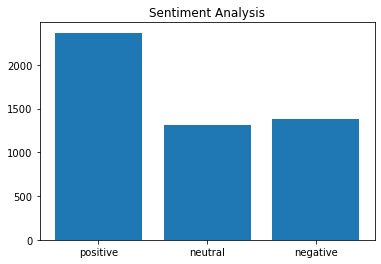

In [8]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.title('Sentiment Analysis')

## Word Cloud

In [9]:
# load the backgroud image
wine_mask = np.array(Image.open("wine.png"))

In [10]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["corona", "beer", "corona beer", "coronavirus", "coronabeer", "COVID", "virus", "alcohol", "S", "s"])

# Create text list
positive_text = " ".join(tweet for tweet in positive)
neutral_text = " ".join(tweet for tweet in neutral)
negative_text = " ".join(tweet for tweet in negative)


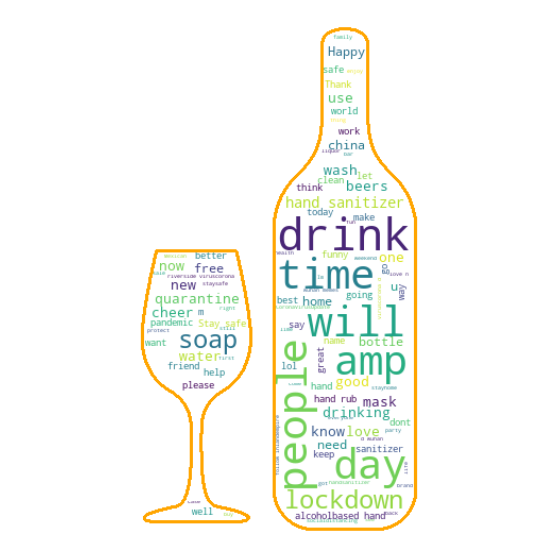

In [12]:
# POSITIVE
wc = WordCloud(background_color="white", max_words=100, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='orange')

wc.generate(positive_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

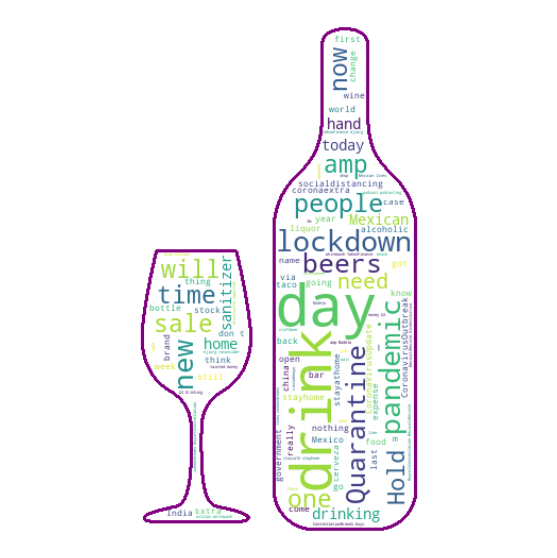

In [13]:
# NEUTRAL
wc = WordCloud(background_color="white", max_words=100, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='purple')

wc.generate(neutral_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

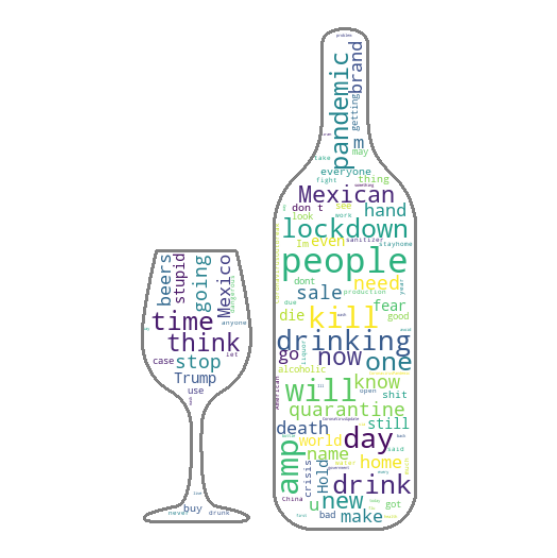

In [14]:
# NEGATIVE
wc = WordCloud(background_color="white", max_words=100, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='grey')

wc.generate(negative_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()